## Observations and Insights 
Tumor volume is smallest for mice treated with Capomulin and Ramicane.  However, the starting weight of each mouse must be taken into consideration because a strong positive correlation seems to exist between average weight of the mice and the average size of the tumors.  There's a possibility that the relative size of the tumors are small not because of the drug treatment, but because the weights of the mice were lower to begin with.

The p-value is very small suggesting that the correlation between mice weight and tumor size is statistically significant.

Whether due to more mice or longer testing periods, drug regimens Capomulin and Ramicane collected more timepoints compared to other drug regimens by almost 20%.  This is important because after plotting the tumor volume of one mouse treated with Capomulin over 40 days, the volume of the tumor increased after day 30.  Some mice have a maximum timepoint of 0, which, assuming drug regimens decrease tumor size over time, will likely increase the average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='outer')
# Display the data table for preview
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
df['Mouse ID'].unique().size

249

In [3]:
df.value_counts(sort=True,ascending=False)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
g989      0          45.000000           0                 Propriva      Female  21          26            2
a203      0          45.000000           0                 Infubinol     Female  20          23            1
q597      40         44.471821           2                 Ramicane      Male    20          25            1
q633      10         49.001866           0                 Zoniferol     Male    12          25            1
          5          47.183802           0                 Zoniferol     Male    12          25            1
                                                                                                          ..
i177      45         33.562402           3                 Ramicane      Male    10          18            1
          40         35.557933           2                 Ramicane      Male    10          18            1
          35         35.

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.groupby(['Mouse ID','Timepoint']).count()

duplicate.loc[duplicate['Tumor Volume (mm3)']>1]

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     0                           2                 2             2    2   
         5                           2                 2             2    2   
         10                          2                 2             2    2   
         15                          2                 2             2    2   
         20                          2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                   2           2  
         5                   2           2  
         10                  2           2  
         15                  2           2  
         20                  2           2

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

df.loc[df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].unique().size

249

In [8]:
cleaned_df.loc[df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_df = cleaned_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_df = drug_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_df.mean()
drug_df.median()
drug_df.var()
drug_df.std()
drug_df.sem()
# Assemble the resulting series into a single summary dataframe.
drug_summary = pd.DataFrame({'Mean': drug_df.mean()['Tumor Volume (mm3)'],
              'Median': drug_df.median()['Tumor Volume (mm3)'],
             'Variance': drug_df.var()['Tumor Volume (mm3)'],
             'Standard Deviation': drug_df.std()['Tumor Volume (mm3)'],
             'Standard Error of Means': drug_df.sem()['Tumor Volume (mm3)']})
drug_summary.sort_values('Variance')


,Mean,Median,Variance,Standard Deviation,Standard Error of Means
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
drug_df.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)'].sort_values('var')


,mean,median,var,std,sem
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_timepoints = cleaned_df[['Timepoint','Drug Regimen']].set_index('Drug Regimen')
all_mice = mice_timepoints.groupby(['Drug Regimen']).count()
all_mice



,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [12]:
all_mice.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

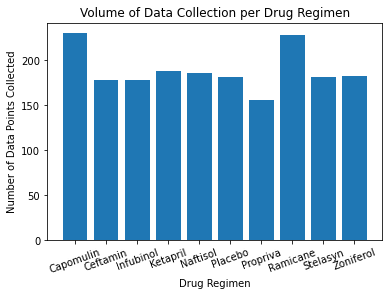

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(all_mice))
tick_locations = [row for row in x_axis]
plt.xticks(tick_locations,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation=20)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points Collected')
plt.title('Volume of Data Collection per Drug Regimen')
plt.bar(x_axis, all_mice.Timepoint)
plt.show()


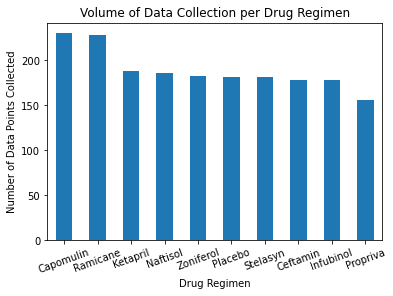

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
all_mice.plot(kind='bar',
              title='Volume of Data Collection per Drug Regimen',
              ylabel='Number of Data Points Collected', 
              xlabel='Drug Regimen', rot=20, legend=False)
plt.show()

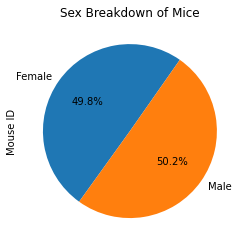

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
number_of_mice.plot(kind='pie',autopct='%1.1f%%',startangle=55)
plt.title('Sex Breakdown of Mice')
plt.show()

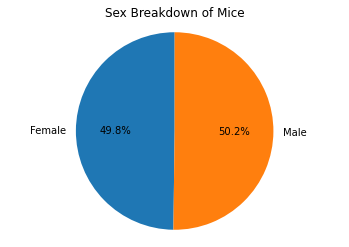

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_of_mice = cleaned_df[['Mouse ID','Sex']]
sex_of_mice = sex_of_mice.drop_duplicates('Mouse ID')
sex_of_mice = sex_of_mice.groupby(['Sex']).count()
number_of_mice = sex_of_mice['Mouse ID']
sex = ['Female','Male']

plt.pie(number_of_mice,labels=sex,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Sex Breakdown of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(cleaned_df.groupby('Mouse ID')['Timepoint'].max())
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(cleaned_df,max_timepoint, on=['Mouse ID','Timepoint'])
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17
245,i557,45,47.685963,1,Capomulin,Female,1,24
246,m957,45,33.329098,1,Capomulin,Female,3,19
247,f966,20,30.485985,0,Capomulin,Male,16,17


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for row in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == row, 'Tumor Volume (mm3)']
    
    # add subset
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol<lower_bound) | (tumor_vol>upper_bound)]
    print(f'''Lower bound and upper bound for {row} is {lower_bound} and {upper_bound}
    Outliers for {row} are: {outliers}''')


Lower bound and upper bound for Capomulin is 20.70456164999999 and 51.83201549
    Outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Lower bound and upper bound for Ramicane is 17.912664470000003 and 54.30681135
    Outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Lower bound and upper bound for Infubinol is 36.83290494999999 and 82.74144559000001
    Outliers for Infubinol are: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Lower bound and upper bound for Ceftamin is 25.355449580000002 and 87.66645829999999
    Outliers for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


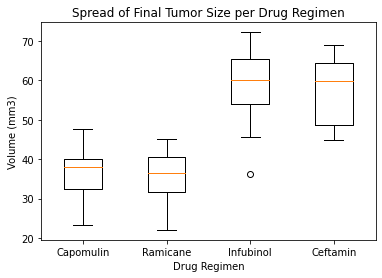

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(total_tumor_vol, labels=treatments)
plt.title('Spread of Final Tumor Size per Drug Regimen')
plt.ylabel('Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

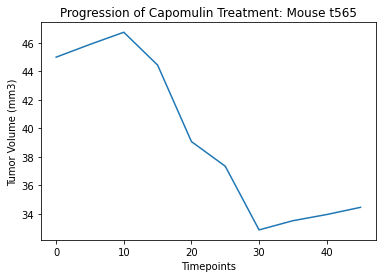

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Choose mouse and gather data
cap_mouse = cleaned_df[cleaned_df['Mouse ID']=='t565'][['Timepoint','Tumor Volume (mm3)']]

# plot line graph
x_axis = cap_mouse['Timepoint']
mouse_tumor = cap_mouse['Tumor Volume (mm3)']
plt.title('Progression of Capomulin Treatment: Mouse t565')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoints')
plt.plot(x_axis,mouse_tumor)
plt.show()

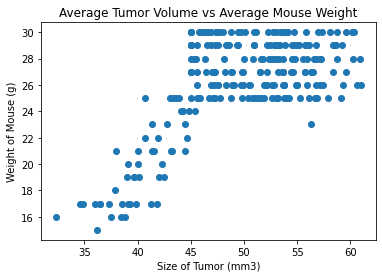

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# create df of avg tumor volume vs mouse weight
cap_df_avg = cleaned_df.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)','Weight (g)']]
cap_df_avg
plt.xlabel('Size of Tumor (mm3)')
plt.ylabel('Weight of Mouse (g)')
plt.title('Average Tumor Volume vs Average Mouse Weight')
plt.scatter(cap_df_avg['Tumor Volume (mm3)'],cap_df_avg['Weight (g)'])
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
st.pearsonr(cap_df_avg['Tumor Volume (mm3)'],cap_df_avg['Weight (g)'])[0]

# for mouse weight and average tumor volume for the Capomulin regimen


0.6588895715215248

In [33]:
# linear regression model
linear_regression=st.linregress(cap_df_avg['Tumor Volume (mm3)'],cap_df_avg['Weight (g)'])
linear_regression

LinregressResult(slope=0.39587616243386936, intercept=6.452734169661898, rvalue=0.6588895715215245, pvalue=2.208438331611904e-32, stderr=0.028757721801578217, intercept_stderr=1.4393118470002946)

In [34]:
slope = linear_regression[0]
intercept = linear_regression[1]
print(f'''{slope} {intercept}''')

0.39587616243386936 6.452734169661898


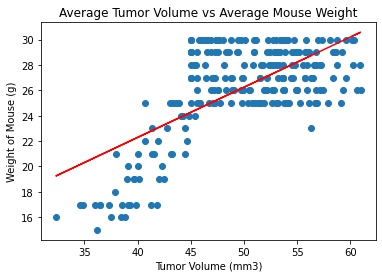

In [35]:
lin_reg_figure = cap_df_avg['Tumor Volume (mm3)']*slope+intercept
plt.scatter(cap_df_avg['Tumor Volume (mm3)'],cap_df_avg['Weight (g)'])
plt.plot(cap_df_avg['Tumor Volume (mm3)'],lin_reg_figure, color='r')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight of Mouse (g)')
plt.title('Average Tumor Volume vs Average Mouse Weight')

plt.show()